#### Step 1. Add dependencies

In [ ]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

#### Step 2. Define the structure of a state in the graph

In [ ]:
class State(TypedDict):
    messages: str

#### Step 3. Add Node
* It takes a state as input and returns a **new state** based on the messages

In [ ]:
def first_node(state: State) -> State:
    """Node that processes the messages and updates the state."""
    new_state = State(messages=state['messages'] + " Processed by agentic flow.")
    return new_state

#### Step 4. Init and fill Graph Builder

In [16]:
graph_builder = StateGraph(State) # Create a graph builder for the State type
graph_builder.add_node("first_node", first_node) # Add the first node to the graph
graph_builder.add_edge(START, "first_node") # Connect the START node to the first node
graph_builder.add_edge("first_node", END) # Connect the first node to the END node

#### Step 5. Compile Graph Builder

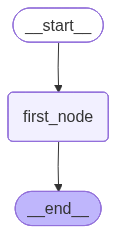

In [ ]:

from IPython.display import Image, display
app = graph_builder.compile()
display(Image(app.get_graph().draw_mermaid_png()))

#### Step 6. Invoke Compiled Graph

In [15]:
result = app.invoke({"messages": "Mello Message"})
result["messages"]

'Mello Message Processed by agentic flow.'